In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import matplotlib.image as mpimg

In [ ]:
def plotImage(img, title=""):
    plt.subplots(figsize=(15, 10))
    plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB)),plt.title(title)
    plt.xticks([]), plt.yticks([])
    plt.show()

def plot4Images(img1, img2, img3, img4, titleImages = np.full(4, " ")):
    plt.subplots(figsize=(16, 14))
    plt.subplot(221), plt.imshow(cv.cvtColor(img1, cv.COLOR_BGR2RGB)),plt.title(titleImages[0])
    #plt.xticks([]), plt.yticks([])
    plt.subplot(222), plt.imshow(cv.cvtColor(img2, cv.COLOR_BGR2RGB)),plt.title(titleImages[1])
    #plt.xticks([]), plt.yticks([])
    plt.subplot(223), plt.imshow(cv.cvtColor(img3, cv.COLOR_BGR2RGB)),plt.title(titleImages[2])
    #plt.xticks([]), plt.yticks([])
    plt.subplot(224), plt.imshow(cv.cvtColor(img4, cv.COLOR_BGR2RGB)),plt.title(titleImages[3])
    #plt.xticks([]), plt.yticks([])
    plt.show()

def plot2Images(img1, img2, titleImages = np.full(2, " ")):
    plt.subplots(figsize=(16, 14))
    plt.subplot(121), plt.imshow(cv.cvtColor(img1, cv.COLOR_BGR2RGB)),plt.title(titleImages[0])
    #plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(cv.cvtColor(img2, cv.COLOR_BGR2RGB)),plt.title(titleImages[1])
    #plt.xticks([]), plt.yticks([])
    plt.show()

### **Slide 28**

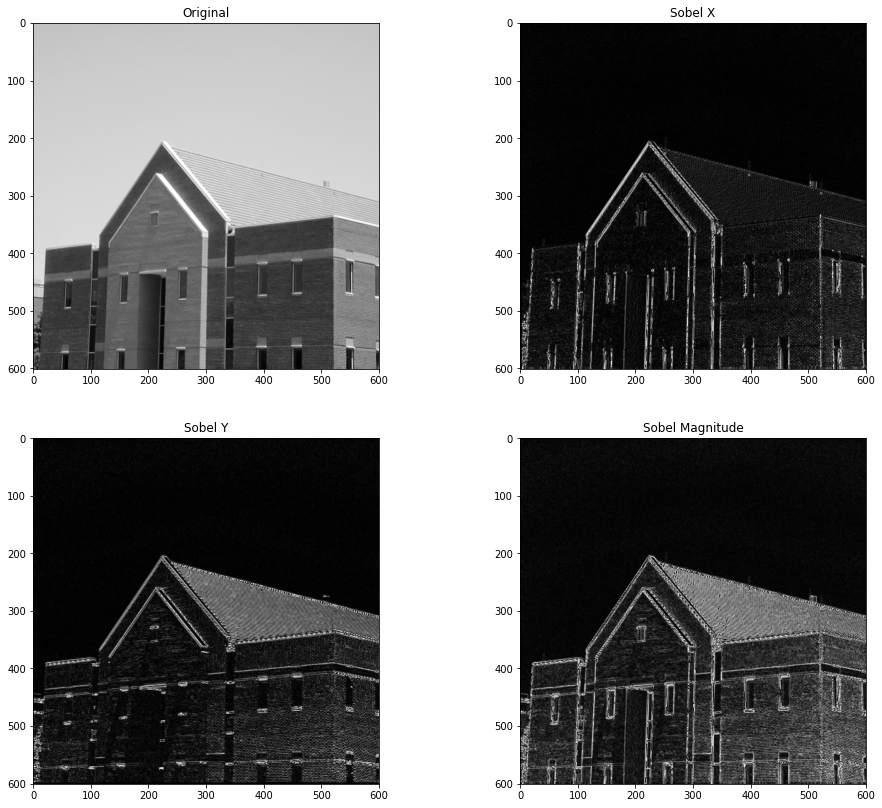

In [ ]:
img = cv.imread("building.tif")

SobelGx = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])

SobelGy = np.array([[1, 2, 1],
                    [0, 0, 0],
                    [-1, -2, -1]])

# precisa definir depth = cv.CV_64F por conta dos valores negativos
imgSobelx = cv.filter2D(img, cv.CV_64F, SobelGx)
imgSobely = cv.filter2D(img, cv.CV_64F, SobelGy)

#imgSobelMag = np.hypot(imgSobelx, imgSobely).astype(np.uint8)
imgSobelMag = (np.abs(imgSobelx) + np.abs(imgSobely)).astype(np.uint8)

imgSobelxAbs = np.abs(imgSobelx).astype(np.uint8)
imgSobelyAbs = np.abs(imgSobely).astype(np.uint8)

plot4Images(img, imgSobelxAbs, imgSobelyAbs, imgSobelMag, ["Original", "Sobel X", "Sobel Y", "Sobel Magnitude"])

### **Slide 29**

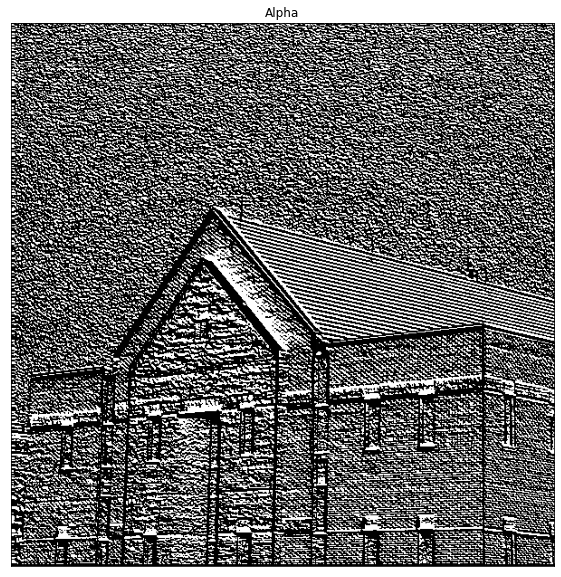

In [ ]:
norm = np.zeros((800, 800))
imgSobelAlpha = np.arctan2(imgSobely, imgSobelx).astype(np.uint8)
imgSobelAlpha = cv.normalize(imgSobelAlpha, norm, 0, 255, cv.NORM_MINMAX)
plotImage(imgSobelAlpha, "Alpha")

### **Slide 30**

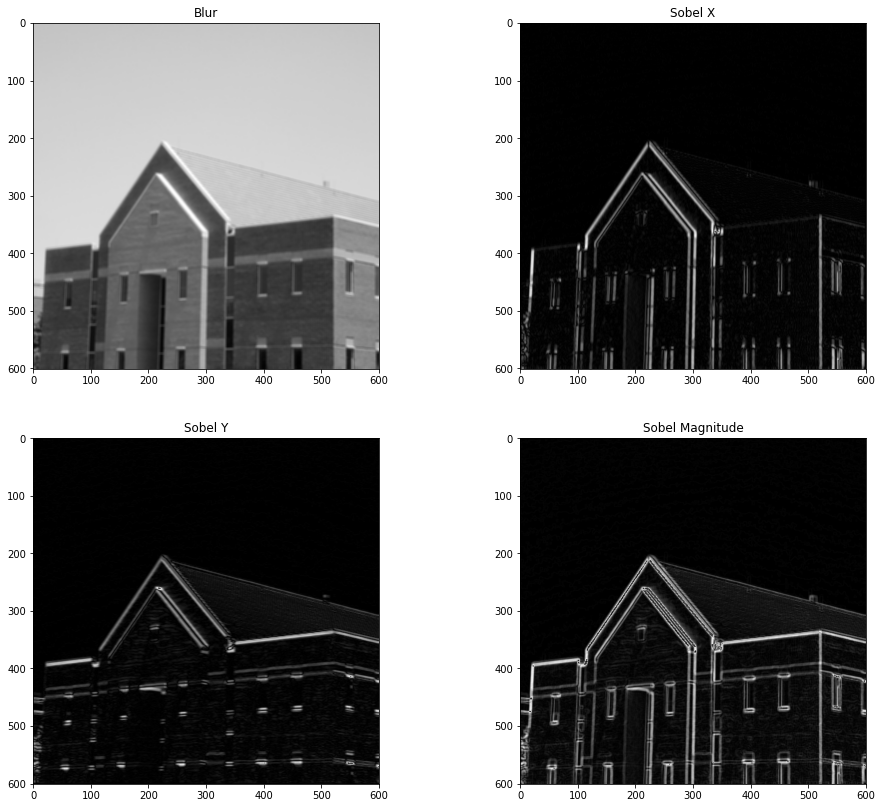

In [ ]:
blur = cv.blur(img, (5, 5))

imgSobelxBlur = cv.filter2D(blur, cv.CV_64F, SobelGx)
imgSobelyBlur = cv.filter2D(blur, cv.CV_64F, SobelGy)

#imgSobelMagBlur = np.hypot(imgSobelxBlur, imgSobelyBlur).astype(np.uint8)
imgSobelMagBlur = (np.abs(imgSobelxBlur) + np.abs(imgSobelyBlur)).astype(np.uint8)

imgSobelxBlurAbs = np.abs(imgSobelxBlur).astype(np.uint8)
imgSobelyBlurAbs = np.abs(imgSobelyBlur).astype(np.uint8)

plot4Images(blur, imgSobelxBlurAbs, imgSobelyBlurAbs, imgSobelMagBlur, ["Blur", "Sobel X", "Sobel Y", "Sobel Magnitude"])

### **Slide 31**

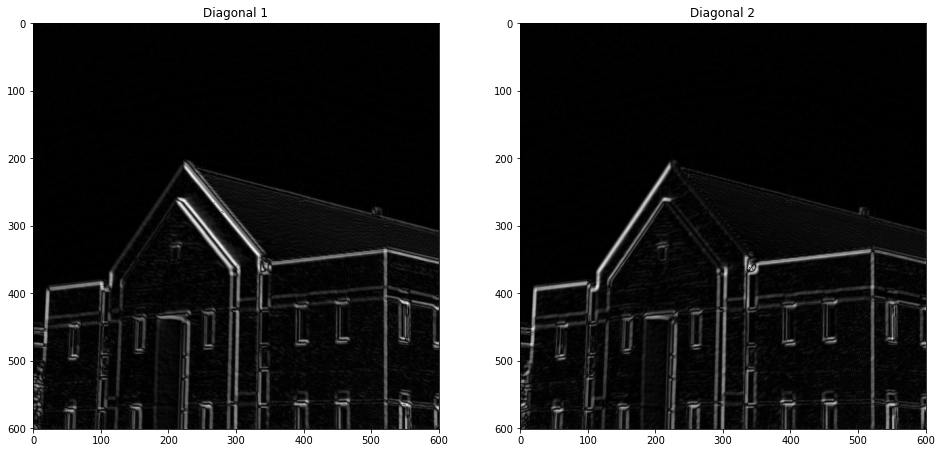

In [ ]:
SobelDiagonal1 = np.array([[0, 1, 2],
                           [-1, 0, 1],
                           [-2, -1, 0]])

SobelDiagonal2 = np.array([[-2, -1, 0],
                           [-1, 0, 1],
                           [0, 1, 2]])

imgSobelDiag1 = cv.filter2D(blur, cv.CV_64F, SobelDiagonal1)
imgSobelDiag2 = cv.filter2D(blur, cv.CV_64F, SobelDiagonal2)

imgSobelDiag1 = np.abs(imgSobelDiag1).astype(np.uint8)
imgSobelDiag2 = np.abs(imgSobelDiag2).astype(np.uint8)

plot2Images(imgSobelDiag1, imgSobelDiag2, ["Diagonal 1", "Diagonal 2"])

### **Slide 32**

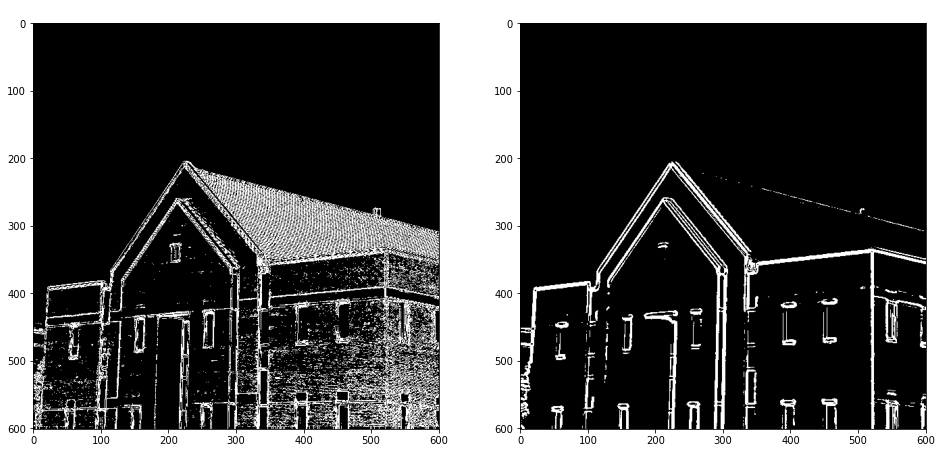

In [ ]:
_, imgThresh = cv.threshold(imgSobelMag, imgSobelMag.max()*0.33,255,cv.THRESH_BINARY)
_, imgThreshBlur = cv.threshold(imgSobelMagBlur, imgSobelMagBlur.max()*0.33,255,cv.THRESH_BINARY)

plot2Images(imgThresh, imgThreshBlur)